## KNN基本步骤

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### 加载数据

In [3]:
iris = load_iris()

data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
data.shape

(150, 4)

In [4]:
target.size

150

### 特征评估

In [4]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

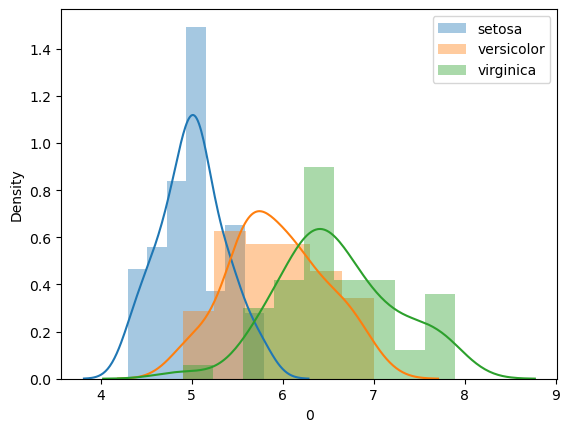

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

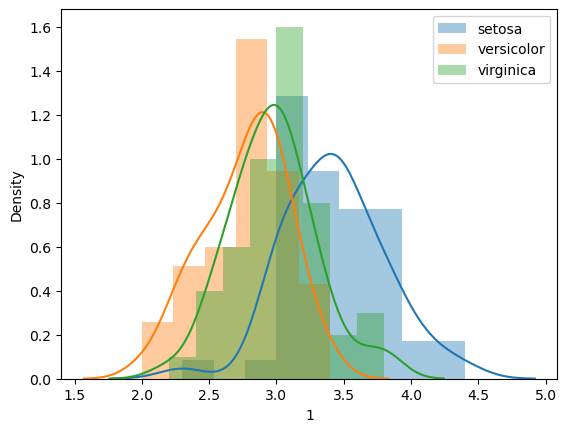

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

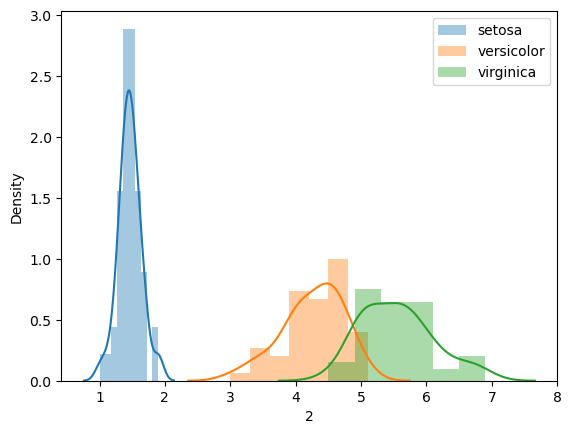

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

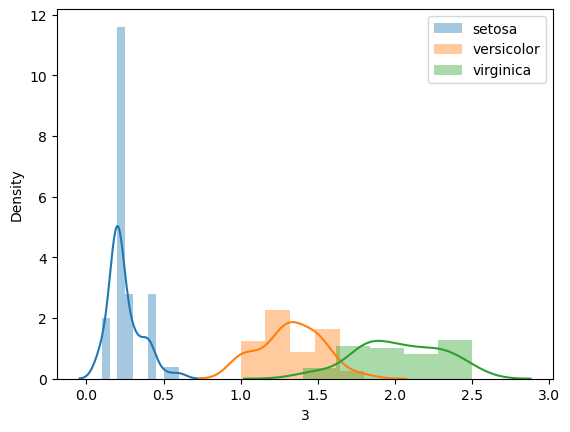

In [8]:
df = pd.DataFrame(data=data)
class1 = df.iloc[target==0]
class2 = df.iloc[target==1]
class3 = df.iloc[target==2]

for col_name in df:
    data1 = class1[col_name]
    data2 = class2[col_name]
    data3 = class3[col_name]
    
    sns.distplot(data1,label="setosa")
    sns.distplot(data2,label="versicolor")
    sns.distplot(data3,label="virginica")
    plt.legend()
    plt.show()

### KNN使用

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# 创建模型
knn = KNeighborsClassifier(n_neighbors=5,weights="distance")

# 划分样本数据
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

# 训练
knn.fit(X_train,y_train)

# 预测
knn.predict(X_test)

# 打分
knn.score(X_test,y_test)

0.9473684210526315

## 不同K值的学习曲线

In [6]:
k_list = np.arange(1,21,step=2)
k_list

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

### 样本集的划分会影响模型，所以用多个random_state取平均值

In [7]:
test_mean_acc_list = []
train_mean_acc_list = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,weights="distance")
    test_acc_list = []
    train_acc_list = []
    # 不同random_state划分的随机性的平均值
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=i)
        knn.fit(X_train,y_train)
        test_acc = knn.score(X_test,y_test)
        train_acc = knn.score(X_train,y_train)
        test_acc_list.append(test_acc)
        train_acc_list.append(train_acc)
    test_mean_acc = np.array(test_acc_list).mean()
    train_mean_acc = np.array(train_acc_list).mean()
    test_mean_acc_list.append(test_mean_acc)
    train_mean_acc_list.append(train_mean_acc)

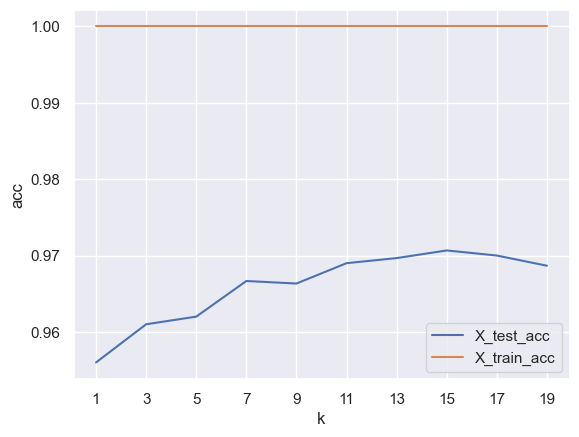

In [8]:
sns.set()
plt.plot(k_list,test_mean_acc_list,label="X_test_acc")
plt.plot(k_list,train_mean_acc_list,label="X_train_acc")
plt.xlabel("k")
plt.ylabel("acc")
plt.xticks(k_list)
plt.legend()

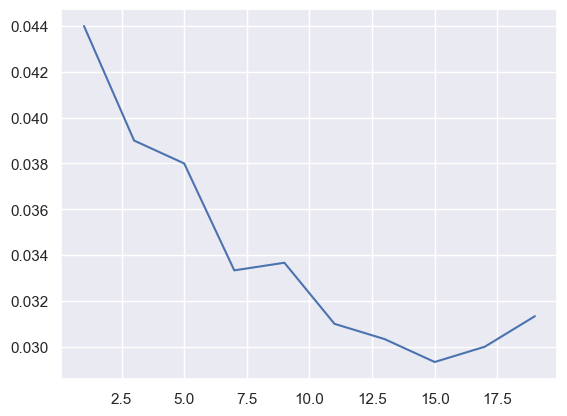

In [9]:
plt.plot(k_list,np.array(train_mean_acc_list)-np.array(test_mean_acc_list),label="train-test")

### 测试集评分应该和训练集的评分相近

In [10]:
# 如图得到评分最高的模型的K值为13
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=13,weights="distance")
knn.fit(X_train,y_train)
acc = knn.score(X_test,y_test)
acc

0.9473684210526315

## 分类边界

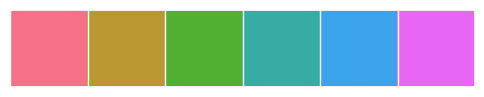

In [11]:
colors = sns.color_palette("husl")
sns.palplot(colors)

In [12]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors[:3])

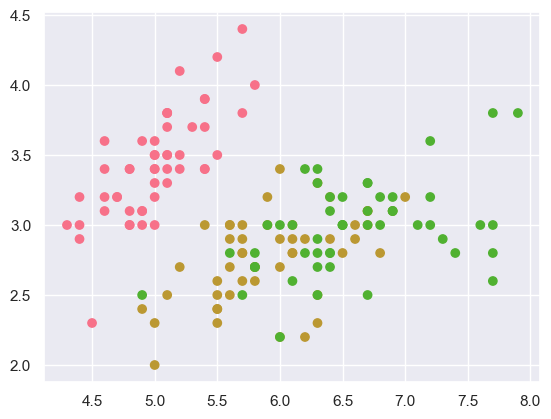

In [13]:
# 只取前两个特征，方便绘图
plt.scatter(data[:,0],data[:,1],c=target,cmap=cmap)

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=1,weights="distance")
knn2 = KNeighborsClassifier(n_neighbors=13,weights="distance")

# 只取前两个特征，方便绘图
X = data[:,:2]
y = target

knn1.fit(X,y)
knn2.fit(X,y)

xmin,xmax = data[:,0].min(),data[:,0].max()
ymin,ymax = data[:,1].min(),data[:,1].max()

x_list = np.linspace(xmin,xmax,100)
y_list = np.linspace(ymin,ymax,100)

# 广播
xx , yy = np.meshgrid(x_list,y_list)

# c_及联 ravel把多维转为一唯
np.c_[yy.ravel(),xx.ravel()]

# 预测
y1_ = knn1.predict(X_test)
y2_ = knn2.predict(X_test)

# 绘制分类边界
fig,axs = plt.subplots(1,2,figsize=(12,6))
X_test = np.c_[xx.ravel(),yy.ravel()]
axs[0].scatter(X_test[:,0],X_test[:,1],c=y1_)
axs[0].scatter(data[:,0],data[:,1],c=target,cmap=cmap)
axs[1].scatter(X_test[:,0],X_test[:,1],c=y2_)
axs[1].scatter(data[:,0],data[:,1],c=target,cmap=cmap)

ValueError: X has 4 features, but KNeighborsClassifier is expecting 2 features as input.

## 预测年收入大于50k

### 数据导入

In [15]:
# step="," 默认为，分割
adults = pd.read_csv("adults.txt")

### 基本信息查看

In [16]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
adults.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
adults.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<=50K    24720
>50K      7841
Name: salary, dtype: int64

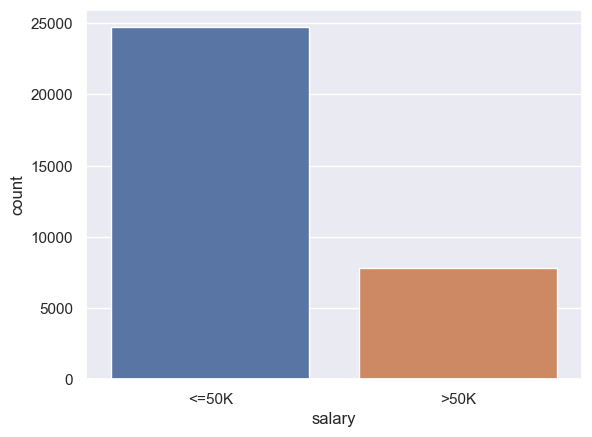

In [19]:
sns.countplot(adults.salary)
adults.salary.value_counts()

### 样本均衡

In [20]:
# 样本筛选拷贝
negative = adults.loc[adults.salary=="<=50K"].iloc[:7841].copy()
positive = adults.loc[adults.salary==">50K"].copy()
# 及联
my_adults = pd.concat((negative,positive),ignore_index=True)
my_adults

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
15678,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
15679,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
15680,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


### 数据提取

In [21]:
samples = my_adults[["age","education","occupation","hours_per_week"]].copy()
salary = my_adults.salary.copy()
samples

,age,education,occupation,hours_per_week
0,39,Bachelors,Adm-clerical,40
1,50,Bachelors,Exec-managerial,13
2,38,HS-grad,Handlers-cleaners,40
3,53,11th,Handlers-cleaners,40
4,28,Bachelors,Prof-specialty,40
...,...,...,...,...
15677,71,Doctorate,?,10
15678,39,Assoc-acdm,Adm-clerical,20
15679,53,Masters,Exec-managerial,40
15680,40,HS-grad,Machine-op-inspct,40


### 数值化处理

In [22]:
target = salary.map({">50K":1,"<=50K":0})

In [23]:
samples.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Assoc-acdm',
       '7th-8th', 'Some-college', 'Assoc-voc', '5th-6th', '10th',
       '1st-4th', 'Preschool', '12th', 'Doctorate', 'Prof-school'],
      dtype=object)

In [24]:
unique_array = samples.education.unique()
def map_function(x):
    # np.argwhere 返回满足条件的值的索引
    return np.argwhere(x==unique_array)
samples.education = samples.education.map(map_function)
samples.education

0         [[0]]
1         [[0]]
2         [[1]]
3         [[2]]
4         [[0]]
          ...  
15677    [[14]]
15678     [[5]]
15679     [[3]]
15680     [[1]]
15681     [[1]]
Name: education, Length: 15682, dtype: object

In [25]:
unique_array = samples.occupation.unique()
def map_function(x):
    # np.argwhere 返回满足条件的值的索引
    return np.argwhere(x==unique_array)
samples.occupation = samples.occupation.map(map_function)
samples.occupation

0         [[0]]
1         [[1]]
2         [[2]]
3         [[2]]
4         [[3]]
          ...  
15677    [[12]]
15678     [[0]]
15679     [[1]]
15680     [[8]]
15681     [[1]]
Name: occupation, Length: 15682, dtype: object

In [27]:
train = samples.copy()

### 选择模型

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [39]:
base_model = KNeighborsClassifier(n_neighbors=5,weights="distance")

In [36]:
def many_predict(train,target,model,count):
    test_scores = []
    train_scores = []
    for i in range(count):
        X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=i)
        model.fit(X_train,y_train)
        test_scores.append(model.score(X_test,y_test))
        train_scores.append(model.score(X_train,y_train))
    return np.array(train_scores),np.array(test_scores)

In [40]:
train_scores,test_scores = many_predict(train,target,base_model,30)

In [41]:
print(f"train_score_mean:{train_scores.mean()},train_score_std{train_scores.std()}")
print(f"test_score_mean{test_scores.mean()},test_score_mean{test_scores.std()}")

train_score_mean:0.8963464859837915,train_score_std0.0013856215407719052
test_score_mean0.6839443204760386,test_score_mean0.006193192182677071


### 模型调优

In [43]:
np.sqrt(train.shape[0]*0.8)

112.0071426293877

In [45]:
k_list = np.arange(3,111,step=14)
k_list

array([  3,  17,  31,  45,  59,  73,  87, 101])

In [49]:
train_mean_scores = []
test_mean_scores = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k,weights="distance")
    train_scores,test_scores = many_predict(train,target,model,10)
    train_mean_scores.append(train_scores.mean())
    test_mean_scores.append(test_scores.mean())

result = pd.DataFrame(data={
    "K":k_list,
    "TRAIN":train_mean_scores,
    "TEST":test_mean_scores
}) 
result

,K,TRAIN,TEST
0,3,0.892268,0.676761
1,17,0.898334,0.691170
2,31,0.898334,0.691457
3,45,0.898334,0.690947
4,59,0.898334,0.691393
5,73,0.898334,0.691234
6,87,0.898334,0.690819
7,101,0.898334,0.690532


<AxesSubplot:xlabel='K'>

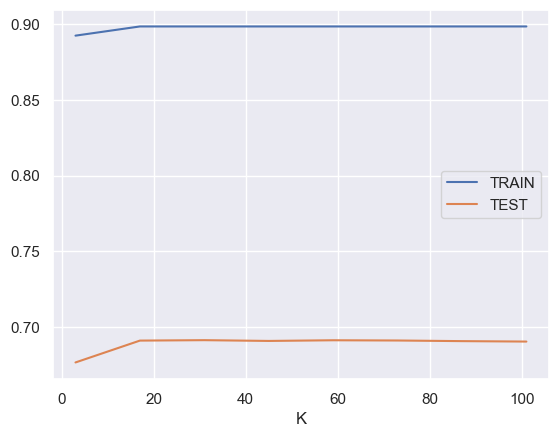

In [50]:
result.set_index("K").plot()